In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
import re

In [2]:
train_data = pd.read_csv("D:\\Study\\SEM 5\\MACHINE LEARNING\\Project\\archive\\train.csv")
test_data = pd.read_csv("D:\\Study\\SEM 5\\MACHINE LEARNING\\Project\\archive\\test.csv")
sample = pd.read_csv("D:\\Study\\SEM 5\\MACHINE LEARNING\\Project\\archive\\sample_submission.csv")
meal_info_data = pd.read_csv("D:\\Study\\SEM 5\\MACHINE LEARNING\\Project\\archive\\meal_info.csv")
fulfilment_center_info_data = pd.read_csv("D:\\Study\\SEM 5\\MACHINE LEARNING\\Project\\archive\\fulfilment_center_info.csv")

In [3]:
train_data.info()
print()
print(train_data.head())
print() 
print()
test_data.info()
print()
print(test_data.head())
print() 
print()
sample.info()
print()
print(sample.head())
print() 
print()
meal_info_data.info()
print()
print(meal_info_data.head())
print() 
print()
fulfilment_center_info_data.info()
print()
print(fulfilment_center_info_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB

        id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.8

In [ ]:
train = pd.merge(train_data, fulfilment_center_info_data, how="left", on="center_id")
train = pd.merge(train, meal_info_data, how="left", on="meal_id")

# Display information about the merged train dataset
train.info()
print()

# Merge test and fulfilment_center_info datasets
test = pd.merge(test_data, fulfilment_center_info_data, how="left", on="center_id")
test = pd.merge(test, meal_info_data, how="left", on="meal_id")

# Display information about the merged test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [5]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [6]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [7]:
train.duplicated().sum()

0

In [8]:
train.sample()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
128091,1164006,44,126,1847,218.28,219.28,0,0,14,577,56,TYPE_A,2.7,Soup,Thai


In [9]:
test.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area
count,3.257300e+04,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000
mean,1.248476e+06,150.477819,81.901728,2032.067909,341.854440,356.493615,0.066435,0.081356,601.519971,56.712154,4.087726
std,1.441580e+05,2.864072,45.950455,547.199004,153.893886,155.150101,0.249045,0.273385,65.996677,17.641174,1.098835
min,1.000085e+06,146.000000,10.000000,1062.000000,67.900000,89.240000,0.000000,0.000000,456.000000,23.000000,0.900000
25%,1.123969e+06,148.000000,43.000000,1558.000000,214.430000,243.500000,0.000000,0.000000,556.000000,34.000000,3.600000
50%,1.247296e+06,150.000000,76.000000,1993.000000,320.130000,321.130000,0.000000,0.000000,596.000000,56.000000,4.000000
75%,1.372971e+06,153.000000,110.000000,2569.000000,446.230000,455.930000,0.000000,0.000000,651.000000,77.000000,4.500000
max,1.499996e+06,155.000000,186.000000,2956.000000,1113.620000,1112.620000,1.000000,1.000000,713.000000,93.000000,7.000000


In [10]:
test.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [11]:
test.duplicated().sum()

0

In [12]:
test.sample()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
2399,1061800,146,30,1803,178.54,178.54,0,0,604,56,TYPE_A,3.5,Extras,Thai


In [13]:
data = [train,test]
print(data)

[             id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1466964     1         55     1993          136.83      135.83   
2       1346989     1         55     2539          134.86      135.86   
3       1338232     1         55     2139          339.50      437.53   
4       1448490     1         55     2631          243.50      242.50   
...         ...   ...        ...      ...             ...         ...   
456543  1271326   145         61     1543          484.09      484.09   
456544  1062036   145         61     2304          482.09      482.09   
456545  1110849   145         61     2664          237.68      321.07   
456546  1147725   145         61     2569          243.50      313.34   
456547  1361984   145         61     2490          292.03      290.03   

        emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                           0                  

In [14]:
# List number of rows in train dataframe
train_rows = len(train)
print(train_rows)

# List number of rows in test dataframe
test_rows = len(test)
print(test_rows)

# Number of unique values in "id" column for both dataframes
train_id = train["id"].nunique()
test_id = test["id"].nunique()

print(train_id)
print(test_id)

456548
32573
456548
32573


In [15]:
for dataset in data:
    dataset.drop(["id"], axis = 1, inplace = True)

In [16]:
# Number of unique values in "week" column for both dataframes
train_week = train["week"].nunique()
test_week = test["week"].nunique()

print(train_week)
print(test_week)

145
10


In [17]:
# Number of counts in "week" column for both dataframes
train_week_count = train["week"].value_counts()
test_week_count = test["week"].value_counts()

print(train_week_count)
print("-" * 100)
print(test_week_count)

week
122    3359
105    3348
106    3347
140    3332
123    3331
       ... 
13     2838
12     2831
14     2830
7      2795
8      2786
Name: count, Length: 145, dtype: int64
----------------------------------------------------------------------------------------------------
week
148    3332
149    3313
150    3277
147    3271
153    3268
152    3242
146    3240
154    3228
151    3224
155    3178
Name: count, dtype: int64


In [18]:
# Number of unique values in "center_id" column for both dataframes
train_center_id = train["center_id"].nunique()
test_center_id = test["center_id"].nunique()

print(train_center_id)
print(test_center_id)

77
77


In [19]:
# Number of counts in "center_id" column for both dataframes
train_center_id_count = train["center_id"].value_counts()
test_center_id_count = test["center_id"].value_counts()

print(train_center_id_count)
print("-" * 100)
print(test_center_id_count)

center_id
13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: count, Length: 77, dtype: int64
----------------------------------------------------------------------------------------------------
center_id
13     509
10     508
52     506
174    504
67     499
      ... 
139    321
57     311
162    310
41     299
91     280
Name: count, Length: 77, dtype: int64


In [20]:
# Number of unique values in "city_code" column for both dataframes
train_city_code = train["city_code"].nunique()
test_city_code = test["city_code"].nunique()

print(train_city_code)
print(test_city_code)

51
51


In [21]:
# Number of counts in "city_code" column for both dataframes
train_city_code_count = train["city_code"].value_counts()
test_city_code_count = test["city_code"].value_counts()

print(train_city_code_count)
print("-" * 100)
print(test_city_code_count)

city_code
590    54746
526    43525
638    20047
522    13459
517    13109
604    13062
699    12098
647    11833
576    11456
614    11332
676    11177
593    10804
685     6993
700     6891
713     6853
579     6843
679     6801
456     6716
703     6706
698     6434
577     6389
599     6296
596     6293
648     6090
602     6057
659     6053
654     6041
628     5983
651     5975
562     5938
615     5892
556     5885
473     5855
561     5846
461     5763
620     5732
609     5721
675     5715
485     5712
658     5591
553     5547
649     5528
680     5379
695     5296
683     5296
632     5292
702     5264
515     5085
478     5021
693     4627
541     4501
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
city_code
590    3962
526    3064
638    1436
522     971
517     930
604     927
614     896
699     860
647     834
576     820
676     796
593     752
685     506
700     504
579     487
456     48

In [22]:
# Number of unique values in "region_code" column for both dataframes
train_region_code = train["region_code"].nunique()
test_region_code = test["region_code"].nunique()

print(train_region_code)
print(test_region_code)

8
8


In [23]:
# Number of counts in "region_code" column for both dataframes
train_region_code_count = train["region_code"].value_counts()
test_region_code_count = test["region_code"].value_counts()

print(train_region_code_count)
print("-" * 100)
print(test_region_code_count)

region_code
56    191228
34    116713
77     94612
85     30283
23      6434
71      6293
93      5721
35      5264
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
region_code
56    13683
34     8265
77     6688
85     2238
71      468
23      449
93      412
35      370
Name: count, dtype: int64


In [24]:
# Number of unique values in "center_type" column for both dataframes
train_center_type = train["center_type"].nunique()
test_center_type = test["center_type"].nunique()

print(train_center_type)
print(test_center_type)

3
3


In [25]:
# Number of counts in "center_type" column for both dataframes
train_center_type_count = train["center_type"].value_counts()
test_center_type_count = test["center_type"].value_counts()

print(train_center_type_count)
print("-" * 100)
print(test_center_type_count)

center_type
TYPE_A    262881
TYPE_C     99593
TYPE_B     94074
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
center_type
TYPE_A    18716
TYPE_C     7009
TYPE_B     6848
Name: count, dtype: int64


In [26]:
# Number of unique values in "op_area" column for both dataframes
train_op_area = train["op_area"].nunique()
test_op_area = test["op_area"].nunique()

print(train_op_area)
print(test_op_area)

30
30


In [27]:
# Number of counts in "op_area" column for both dataframes
train_op_area_count = train["op_area"].value_counts()
test_op_area_count = test["op_area"].value_counts()

print(train_op_area_count)
print("-" * 100)
print(test_op_area_count)

op_area
4.0    52548
3.9    48533
3.8    40080
4.4    26060
4.5    25688
2.8    25503
4.1    23346
7.0    20686
4.8    18648
3.4    17258
3.6    16821
5.1    13366
4.2    12608
2.7    12430
3.0    11184
2.0     9512
6.7     7046
6.3     7015
5.6     6993
3.7     6801
3.5     6666
3.2     6333
5.0     6164
5.3     6053
4.6     5983
4.7     5975
2.4     5021
2.9     4712
1.9     4083
0.9     3432
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
op_area
4.0    3747
3.9    3435
3.8    2853
4.4    1855
4.5    1840
2.8    1770
4.1    1678
7.0    1501
4.8    1332
3.6    1256
3.4    1207
5.1     949
4.2     908
2.7     886
3.0     789
2.0     672
6.7     509
6.3     508
5.6     506
3.5     477
3.7     473
3.2     442
5.0     438
5.3     436
4.7     431
4.6     429
2.4     339
2.9     328
1.9     299
0.9     280
Name: count, dtype: int64


In [28]:
# Number of unique values in "meal_id" column for both dataframes
train_meal_id = train["meal_id"].nunique()
test_meal_id = test["meal_id"].nunique()

print(train_meal_id)
print(test_meal_id)

51
51


In [29]:
# Number of counts in "meal_id" column for both dataframes
train_meal_id_count = train["meal_id"].value_counts()
test_meal_id_count = test["meal_id"].value_counts()

print(train_meal_id_count)
print("-" * 100)
print(test_meal_id_count)

meal_id
2290    11138
1062    11137
1727    11136
1109    11134
1754    11132
2707    11123
1778    11121
1993    11116
1962    11114
1971    11102
1885    11092
2581    11072
2826    11057
2322    11002
1558    10952
1207    10806
2640    10747
1230    10746
1878    10527
2631    10458
2539    10451
1543    10236
2760    10209
1248     9939
2664     9853
2704     9811
1445     9727
2126     9705
1216     9695
2304     9676
2569     9459
2492     9382
1525     9359
2490     9247
2444     9097
2139     8899
2577     8667
2306     8294
2867     8092
1247     7184
1902     6748
1770     6682
1311     4682
1803     4674
1571     4511
1438     4385
1198     4206
2494     4206
1847     4084
2956     3319
2104     2357
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
meal_id
2290    770
2569    770
2664    770
1962    770
1754    770
2826    770
1727    770
1885    769
2490    769
2581    769
1109    769
1971    768

In [30]:
# Number of unique values in "category" column for both dataframes
train_category = train["category"].nunique()
test_category = test["category"].nunique()

print(train_category)
print(test_category)

14
14


In [31]:

# Number of counts in "category" column for both dataframes
train_category_count = train["category"].value_counts()
test_category_count = test["category"].value_counts()

print(train_category_count)
print("-" * 100)
print(test_category_count)

category
Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
category
Beverages       8891
Rice Bowl       2309
Salad           2309
Sandwich        2308
Pizza           2306
Desert          2113
Other Snacks    2104
Starters        1984
Pasta           1927
Seafood         1697
Biryani         1337
Fish            1331
Extras           992
Soup             965
Name: count, dtype: int64


In [32]:
# Number of unique values in "cuisine" column for both dataframes
train_cuisine = train["cuisine"].nunique()
test_cuisine = test[ "cuisine"].nunique()

print(train_cuisine)
print(test_cuisine)

4
4


In [33]:
# Number of counts in "cuisine" column for both dataframes
train_cuisine_count = train["cuisine"].value_counts()
test_cuisine_count = test["cuisine"].value_counts()

print(train_cuisine_count)
print("-" * 100)
print(test_cuisine_count)

cuisine
Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
cuisine
Italian        8836
Thai           8342
Indian         7807
Continental    7588
Name: count, dtype: int64


In [34]:
# Converting "checkout_price" column into Int32 for both dataframes
for dataset in data:
    dataset["checkout_price"] = dataset["checkout_price"].astype("int")

In [35]:
# Converting "base_price" column into Int32 for both dataframes
for dataset in data:
    dataset["base_price"] = dataset["base_price"].astype("int")

In [36]:
# Number of unique values in "emailer_for_promotion" column for both dataframes
train_emailer_for_promotion = train["emailer_for_promotion"].nunique()
test_emailer_for_promotion = test["emailer_for_promotion"].nunique()

print(train_emailer_for_promotion)
print(test_emailer_for_promotion)

2
2


In [37]:
# Number of counts in "emailer_for_promotion" column for both dataframes
train_emailer_for_promotion_count = train["emailer_for_promotion"].value_counts()
test_emailer_for_promotion_count = test["emailer_for_promotion"].value_counts()

print(train_emailer_for_promotion_count)
print("-" * 100)
print(test_emailer_for_promotion_count)

emailer_for_promotion
0    419498
1     37050
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
emailer_for_promotion
0    30409
1     2164
Name: count, dtype: int64


In [38]:
# Number of unique values in "homepage_featured" column for both dataframes
train_homepage_featured = train["homepage_featured"].nunique()
test_homepage_featured = test["homepage_featured"].nunique()

print(train_homepage_featured)
print(test_homepage_featured)

2
2


In [39]:
# Number of counts in "homepage_featured" column for both dataframes
train_train_homepage_featured_count = train["homepage_featured"].value_counts()
test_train_homepage_featured_count = test["homepage_featured"].value_counts()

print(train_train_homepage_featured_count)
print("-" * 100)
print(test_train_homepage_featured_count)

homepage_featured
0    406693
1     49855
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
homepage_featured
0    29923
1     2650
Name: count, dtype: int64


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   week                   456548 non-null  int64  
 1   center_id              456548 non-null  int64  
 2   meal_id                456548 non-null  int64  
 3   checkout_price         456548 non-null  int32  
 4   base_price             456548 non-null  int32  
 5   emailer_for_promotion  456548 non-null  int64  
 6   homepage_featured      456548 non-null  int64  
 7   num_orders             456548 non-null  int64  
 8   city_code              456548 non-null  int64  
 9   region_code            456548 non-null  int64  
 10  center_type            456548 non-null  object 
 11  op_area                456548 non-null  float64
 12  category               456548 non-null  object 
 13  cuisine                456548 non-null  object 
dtypes: float64(1), int32(2), int64(8), o

In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   week                   32573 non-null  int64  
 1   center_id              32573 non-null  int64  
 2   meal_id                32573 non-null  int64  
 3   checkout_price         32573 non-null  int32  
 4   base_price             32573 non-null  int32  
 5   emailer_for_promotion  32573 non-null  int64  
 6   homepage_featured      32573 non-null  int64  
 7   city_code              32573 non-null  int64  
 8   region_code            32573 non-null  int64  
 9   center_type            32573 non-null  object 
 10  op_area                32573 non-null  float64
 11  category               32573 non-null  object 
 12  cuisine                32573 non-null  object 
dtypes: float64(1), int32(2), int64(7), object(3)
memory usage: 3.0+ MB


### DISTRIBUTION OF DEMAND OVER TIME

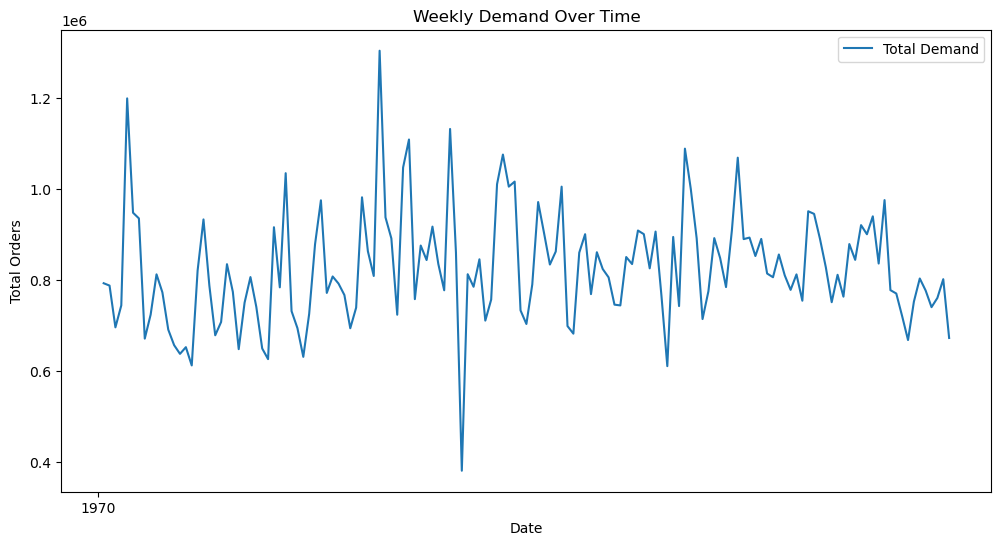

In [42]:
# Ensure the date column is in datetime format and exists in your dataset
train_data['week'] = pd.to_datetime(train_data['week'])  # Replace 'week' with the correct date column

# Aggregate demand by week
demand_over_time = train_data.groupby('week')['num_orders'].sum()  # Replace 'num_orders' if necessary

# Plot the demand over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(demand_over_time.index, demand_over_time.values, label="Total Demand")
plt.title("Weekly Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Total Orders")
plt.legend()
plt.show()

## DEMAND BY FULFILMENT CENTER

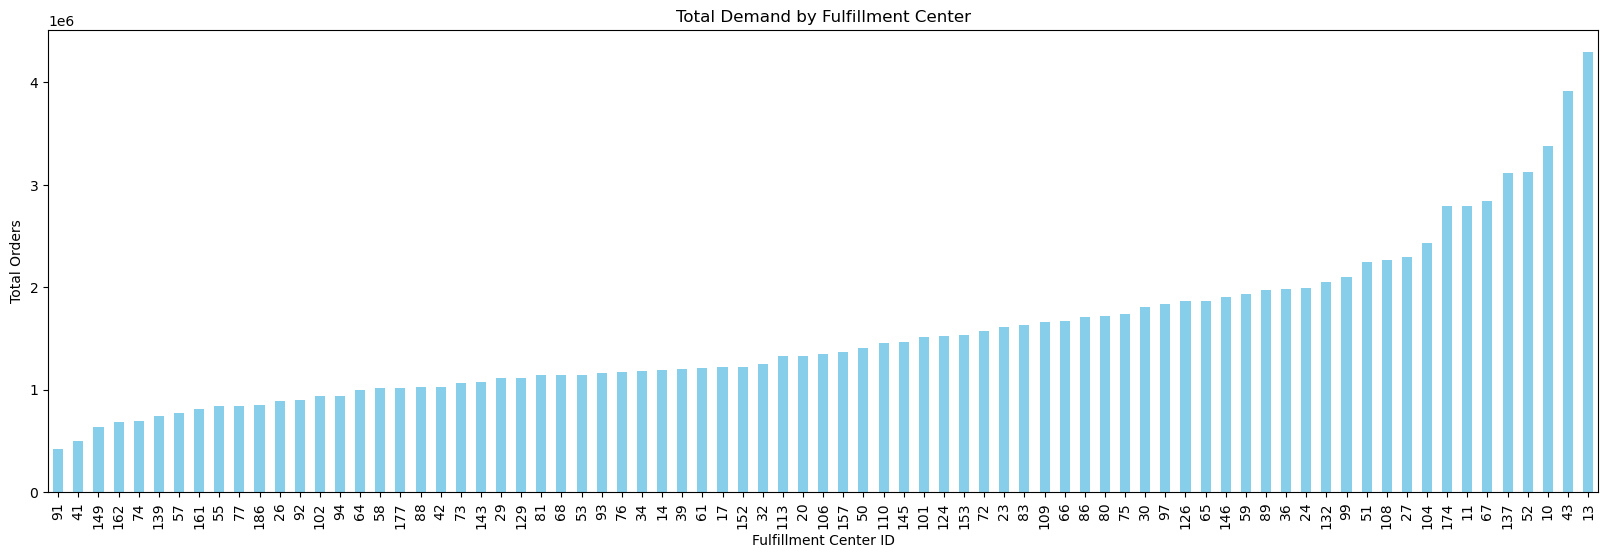

In [43]:
# Aggregate demand by center
center_demand = train_data.groupby('center_id')['num_orders'].sum().sort_values()  # Replace 'center_id' and 'num_orders' as needed

# Plot demand by center
plt.figure(figsize=(20, 6))
center_demand.plot(kind='bar', color='skyblue')
plt.title("Total Demand by Fulfillment Center")
plt.xlabel("Fulfillment Center ID")
plt.ylabel("Total Orders")
plt.show()

## DEMAND BY MEAL TIME

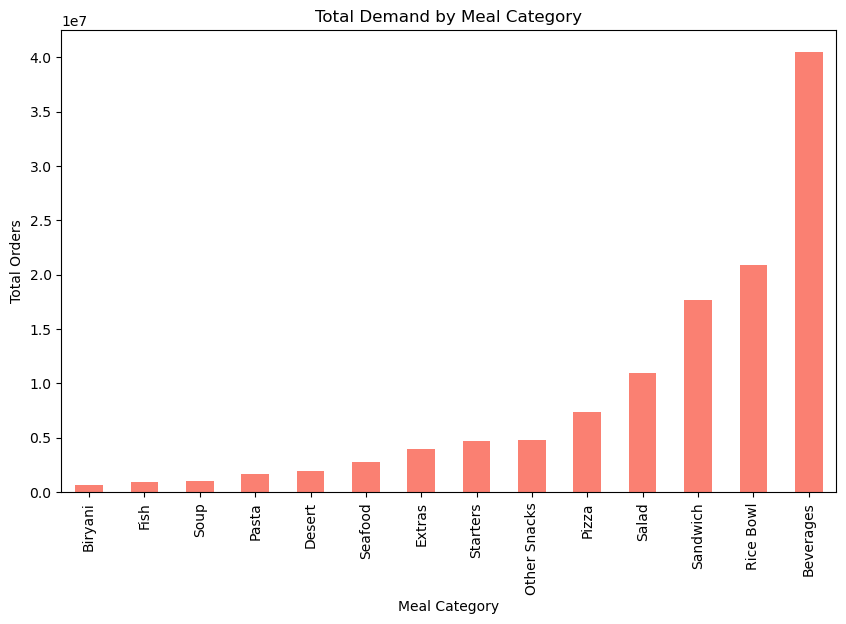

In [44]:
# Merge meal info with the main training dataset to get 'category' and other meal details
train_with_meal_info = train_data.merge(meal_info_data, on='meal_id', how='left')  # Ensure 'meal_id' is the correct join key

# Aggregate demand by meal category
meal_demand = train_with_meal_info.groupby('category')['num_orders'].sum().sort_values()  # Replace 'category' and 'num_orders' as necessary

# Plot demand by meal category
plt.figure(figsize=(10, 6))
meal_demand.plot(kind='bar', color='salmon')
plt.title("Total Demand by Meal Category")
plt.xlabel("Meal Category")
plt.ylabel("Total Orders")
plt.show()

### DATA VISUALISATION ###

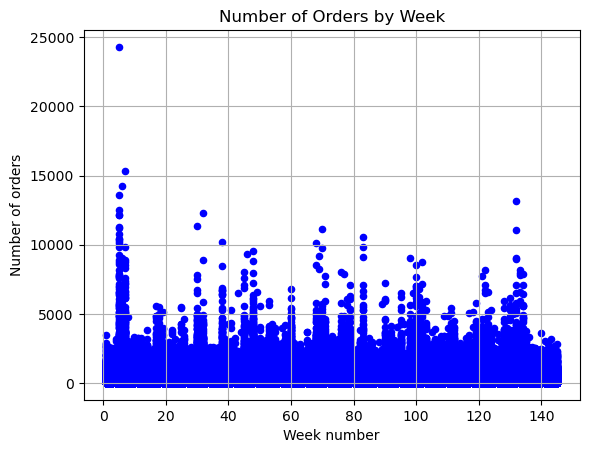

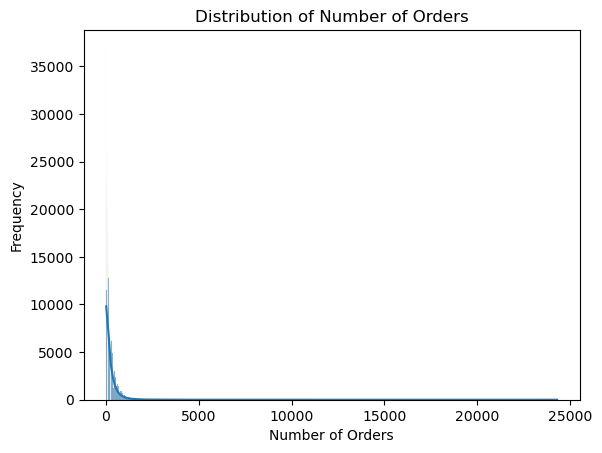

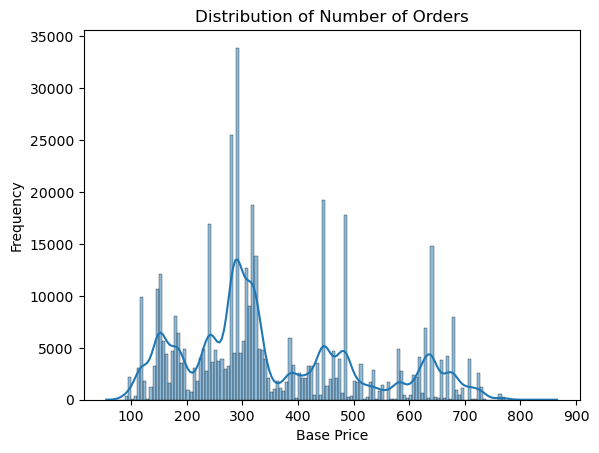

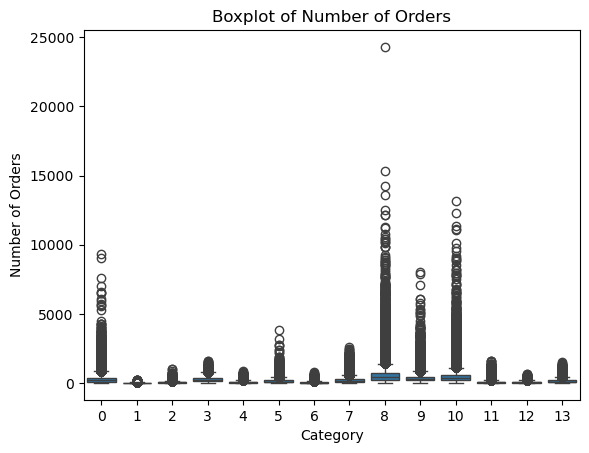

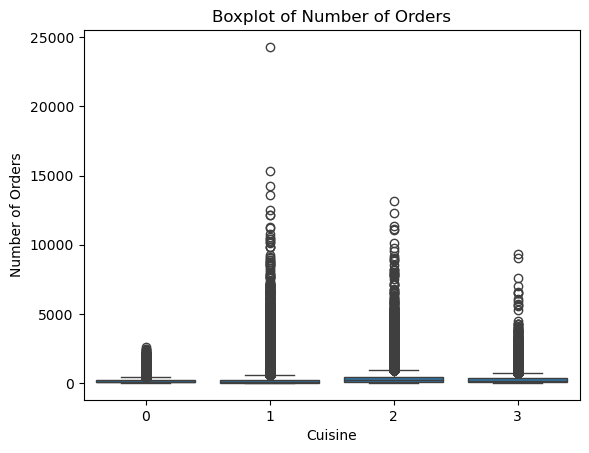

In [92]:
train.plot(kind = "scatter", x = "week", y = "num_orders",
           title = "Number of Orders by Week", xlabel = "Week Number",
           ylabel = "Number of Orders", color = "blue", grid = True)

# train.plot(kind = "scatter", x = "week", y = "num_orders", color ='maroon', 
#         width = 0.4)
plt.xlabel("Week number")
plt.ylabel("Number of orders")
plt.title("Number of Orders by Week")
plt.show()
# Histogram for num_orders distribution
sns.histplot(train['num_orders'], kde=True)
plt.title("Distribution of Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("Frequency")
plt.show()

sns.histplot(train['base_price'], kde=True)
plt.title("Distribution of Number of Orders")
plt.xlabel("Base Price")
plt.ylabel("Frequency")
plt.show()

# Boxplot for num_orders to see outliers
sns.boxplot(y=train['num_orders'], x=train['category'])
plt.title("Boxplot of Number of Orders")
plt.xlabel("Category")
plt.ylabel("Number of Orders")
plt.show()

sns.boxplot(y=train['num_orders'], x=train['cuisine'])
plt.title("Boxplot of Number of Orders")
plt.xlabel("Cuisine")
plt.ylabel("Number of Orders")
plt.show()

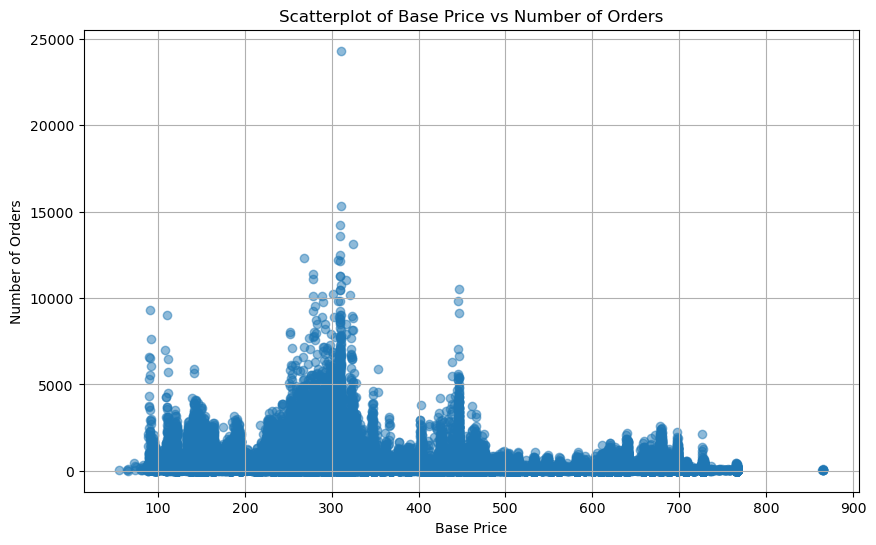

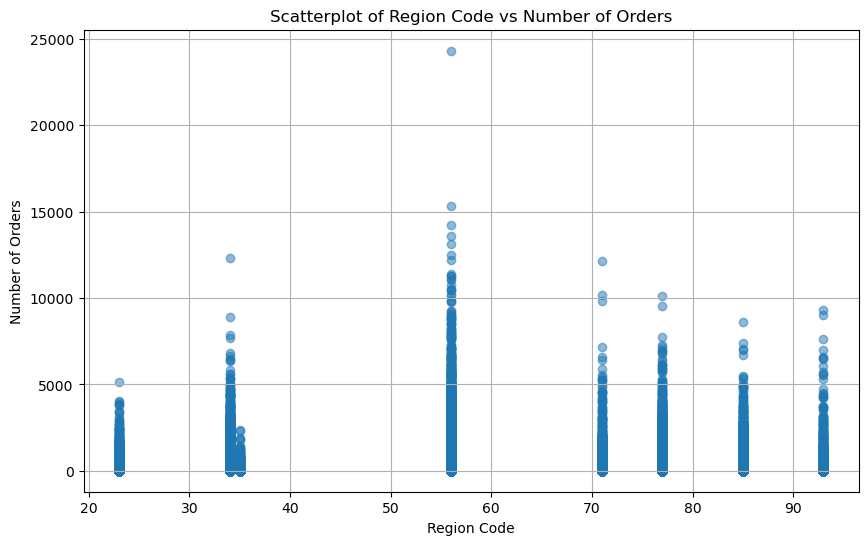

In [95]:
# Plot Scatterplot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(train['base_price'], train['num_orders'], alpha=0.5)  # Create a scatter plot
plt.title('Scatterplot of Base Price vs Number of Orders')  # Set the title of the plot
plt.xlabel('Base Price')  # Set the x-axis label
plt.ylabel('Number of Orders')  # Set the y-axis label
plt.grid(True)  # Enable grid
plt.show()  # Display the plot

# Plot Scatterplot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(train['region_code'], train['num_orders'], alpha=0.5)  # Create a scatter plot
plt.title('Scatterplot of Region Code vs Number of Orders')  # Set the title of the plot
plt.xlabel('Region Code')  # Set the x-axis label
plt.ylabel('Number of Orders')  # Set the y-axis label
plt.grid(True)  # Enable grid
plt.show()  # Display the plot

### COUNT OF CATEGORY ###

Index(['Beverages', 'Rice Bowl', 'Sandwich', 'Pizza', 'Starters',
       'Other Snacks', 'Desert', 'Salad', 'Pasta', 'Seafood', 'Biryani',
       'Extras', 'Soup', 'Fish'],
      dtype='object', name='category')


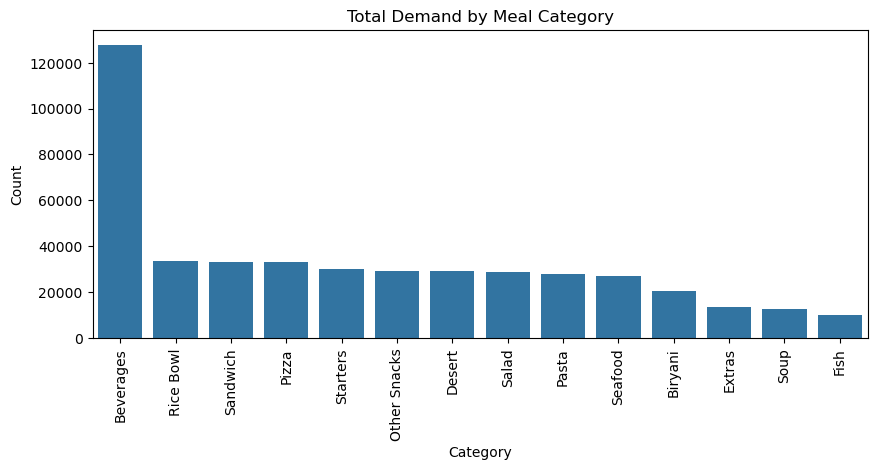

In [46]:
# Calculate the order of "category" in meal_info.csv dataset based on the counts, sorted from greatest to least
category_order = train["category"].value_counts().index
print(category_order)
# Figure size (10, 4) which shows width and height of plot.
plt.figure(figsize = (10, 4)) 

# Count plot for "category"
sns.countplot(data = train, x = "category", order = category_order)

# Plot details
plt.xlabel("Category")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.title("Total Demand by Meal Category")

# Show the plot
plt.show()

### COUNT OF CUISINE ###

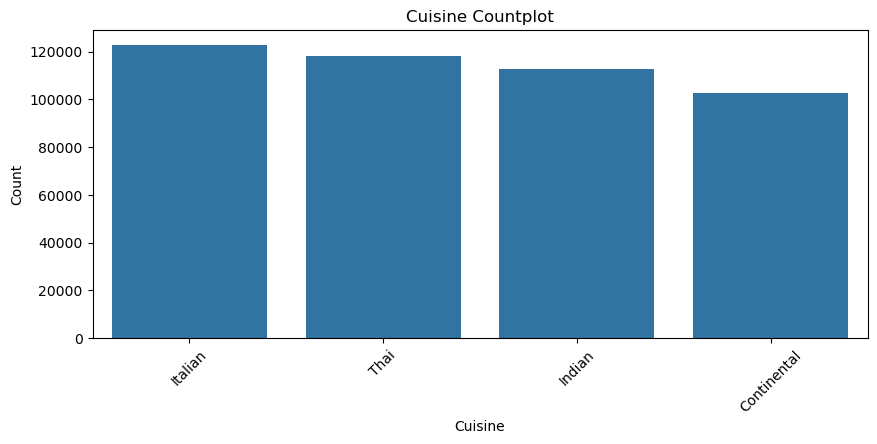

In [47]:
# Calculate the order of "cuisine" based on the counts, sorted from greatest to least
cuisine_order = train["cuisine"].value_counts().index

# Figure size (10, 4)
plt.figure(figsize = (10, 4))

# Count plot for "cuisine"
sns.countplot(data = train, x = "cuisine", order = cuisine_order)

# Plot details
plt.xlabel("Cuisine")
plt.xticks(rotation = 45)
plt.ylabel("Count")
plt.title("Cuisine Countplot")

# Show the plot
plt.show()

### Heatmap Analysis: Key Feature Correlations with Number of Orders ###

In [48]:
# Initialize the LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Iterate through each dataset in the data list
for dataset in data:

    # Apply LabelEncoder to each specified column independently
    for col in ["center_type", "category", "cuisine"]:
        dataset[col] = label_encoder.fit_transform(dataset[col])
    print(dataset[col])

0         3
1         3
2         3
3         1
4         1
         ..
456543    1
456544    1
456545    2
456546    2
456547    2
Name: cuisine, Length: 456548, dtype: int32
0        3
1        3
2        3
3        1
4        1
        ..
32568    1
32569    1
32570    2
32571    2
32572    2
Name: cuisine, Length: 32573, dtype: int32


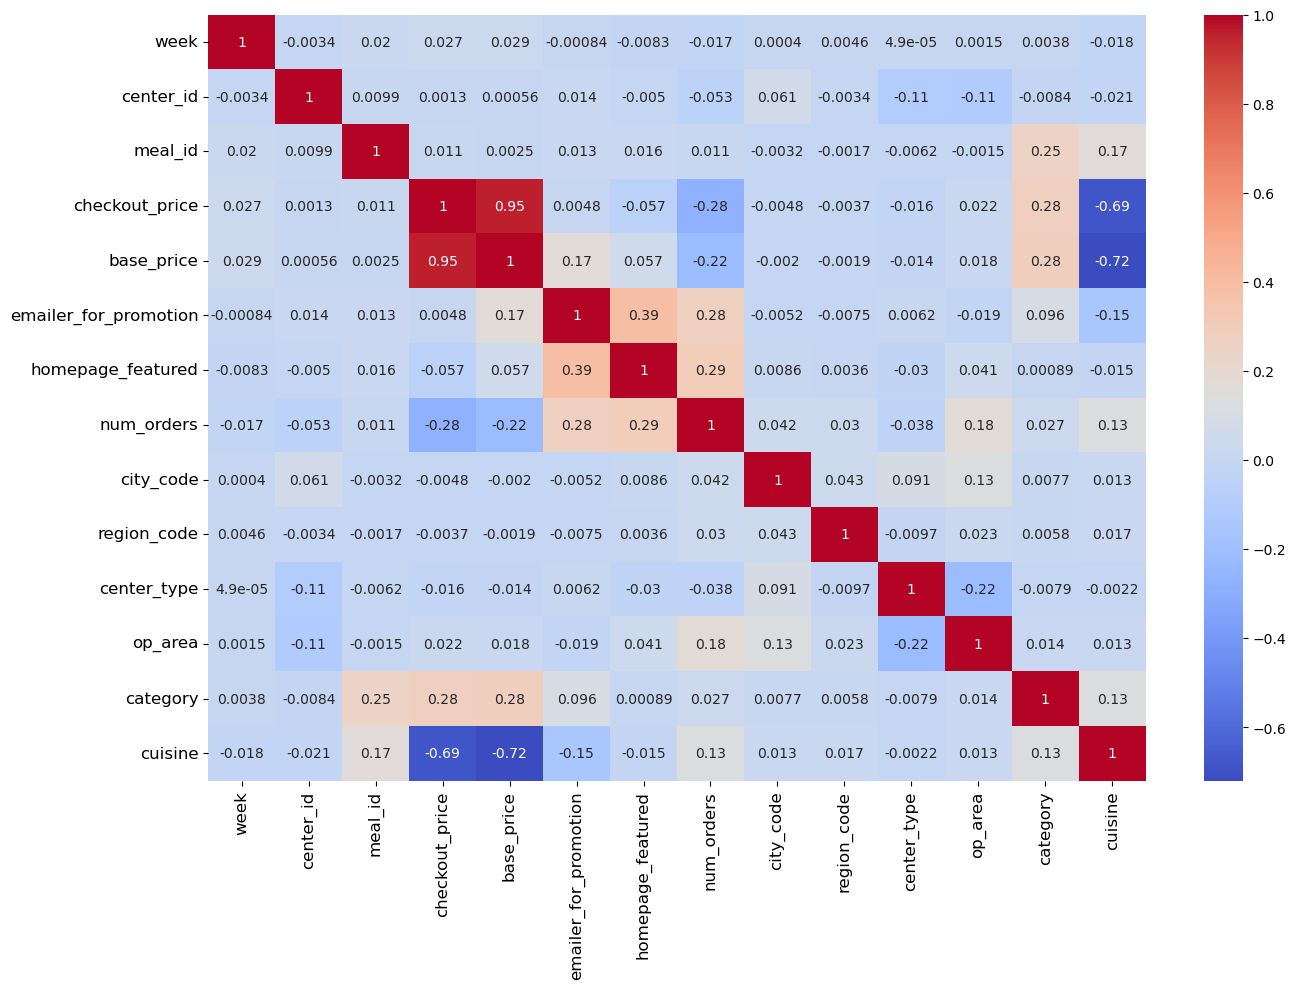

In [49]:
# Figure size
plt.figure(figsize = (14, 10))
# Plot labels
sns.heatmap(train.corr(), cmap = "coolwarm", annot = True)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

## CORRELATION MATRIX (HEATMAP)

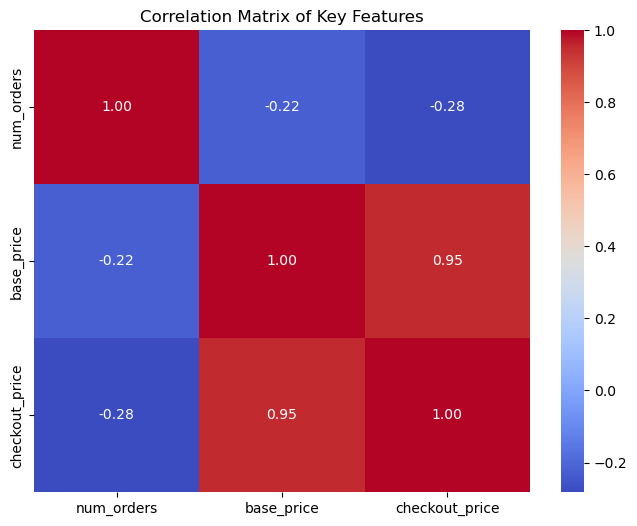

In [50]:
import seaborn as sns

# Select relevant numerical columns, adjust these column names as needed
corr_matrix = train_data[['num_orders', 'base_price', 'checkout_price']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Key Features")
plt.show()

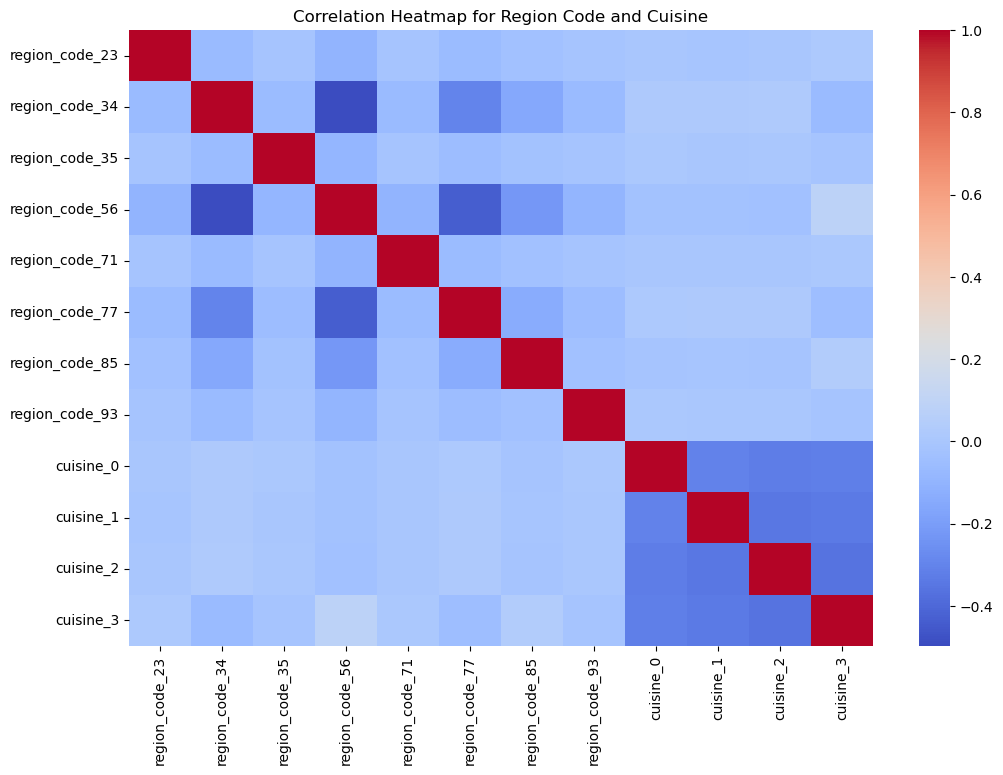

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check if the columns 'region_code' and 'cuisine' are present
if 'region_code' in train.columns and 'cuisine' in train.columns:
    # Copy data to avoid modifying the original DataFrame
    train_data_encoded = train[['region_code', 'cuisine']].copy()
    
    # Apply one-hot encoding to both columns
    train_data_encoded = pd.get_dummies(train_data_encoded, columns=['region_code', 'cuisine'])
    
    # Compute the correlation matrix
    corr_matrix = train_data_encoded.corr()
    
    # Plot the heatmap for the one-hot encoded region_code and cuisine features
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title("Correlation Heatmap for Region Code and Cuisine")
    plt.show()
else:
    print("Columns 'region_code' or 'cuisine' not found in the DataFrame.")


### ACTUAL VS PREDICTED DEMAND (LINE PLOT)

In [51]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load your training dataset
train_data = pd.read_csv("D:\\Study\\SEM 5\\MACHINE LEARNING\\Project\\archive\\train.csv")

# Prepare the data
X = train_data.drop(columns=['num_orders'])
y = train_data['num_orders']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save the trained model
model_path = "D:\\Study\\SEM 5\\MACHINE LEARNING\\Project\\trained_model.pkl"
joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to D:\Study\SEM 5\MACHINE LEARNING\Project\trained_model.pkl


Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured'],
      dtype='object')
Column 'num_orders' not found in test data.


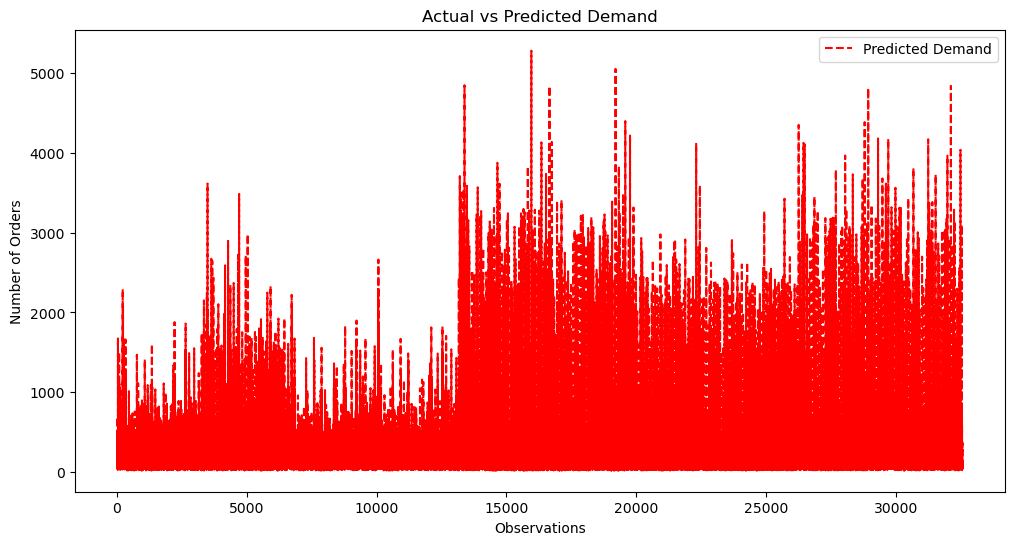

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# Load test data
test_data = pd.read_csv("D:\\Study\\SEM 5\\MACHINE LEARNING\\Project\\archive\\test.csv")

# Print columns to debug
print(test_data.columns)

# Prepare X_test
if 'num_orders' in test_data.columns:
    X_test = test_data.drop(columns=['num_orders'])
else:
    print("Column 'num_orders' not found in test data.")
    X_test = test_data  # Use all columns if 'num_orders' is not present

# Load your trained model
model_path = "D:\\Study\\SEM 5\\MACHINE LEARNING\\Project\\trained_model.pkl"
try:
    model = joblib.load(model_path)
except FileNotFoundError:
    print(f"Model file not found at {model_path}. Please check the path and try again.")
    raise

# Predict using the model
try:
    y_pred_rf = model.predict(X_test)
except NameError:
    print("Model is not defined. Please ensure the model is loaded correctly.")
    raise

# Plotting the actual vs predicted demand
plt.figure(figsize=(12, 6))

# If y_test exists (you have actual values), you can plot both actual vs predicted
if 'num_orders' in test_data.columns:
    y_test = test_data['num_orders']
    plt.plot(y_test.values, label="Actual Demand", color="blue")

# Plot the predicted values
plt.plot(y_pred_rf, label="Predicted Demand", color="red", linestyle="--")

plt.title("Actual vs Predicted Demand")
plt.xlabel("Observations")
plt.ylabel("Number of Orders")
plt.legend()
plt.show()

### DISTRIBUTION OF RELATED ERRORS (HISTOGRAM)

Columns with datetime type: Index([], dtype='object')
Shapes - X_train: (365238, 8), X_test: (91310, 8), y_train: (365238,), y_test: (91310,)


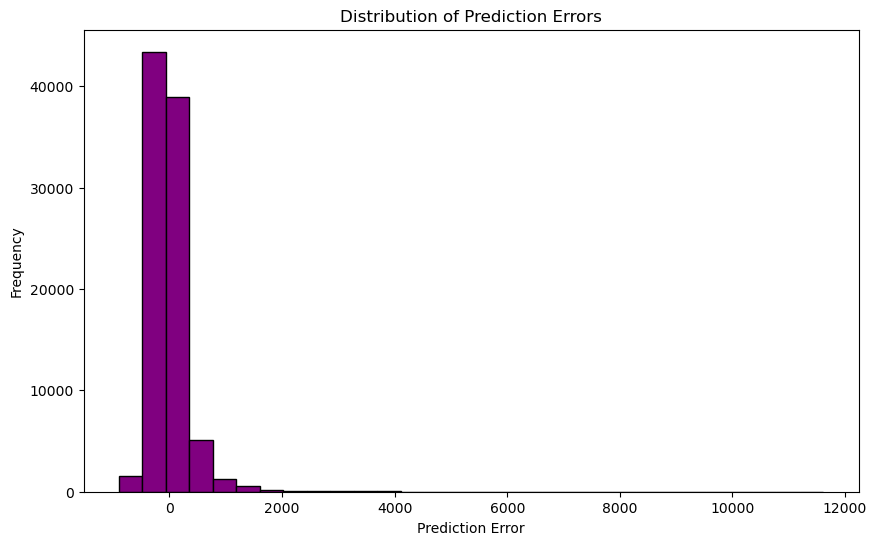

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv("D:\\Study\\SEM 5\\MACHINE LEARNING\\Project\\archive\\train.csv")

# Prepare the data
X = data.drop(columns=['num_orders'])
y = data['num_orders']

# Identify columns with datetime type
datetime_cols = X.select_dtypes(include=['datetime64']).columns
print(f"Columns with datetime type: {datetime_cols}")

# Option 1: Drop datetime columns if they are not needed
X = X.drop(columns=datetime_cols)

# Continue with splitting the data and training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes again
print(f"Shapes - X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate predictions
errors = y_test.values - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, color="purple", edgecolor="black")
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

### Feature Importance (from Decision Tree or Random Forest)

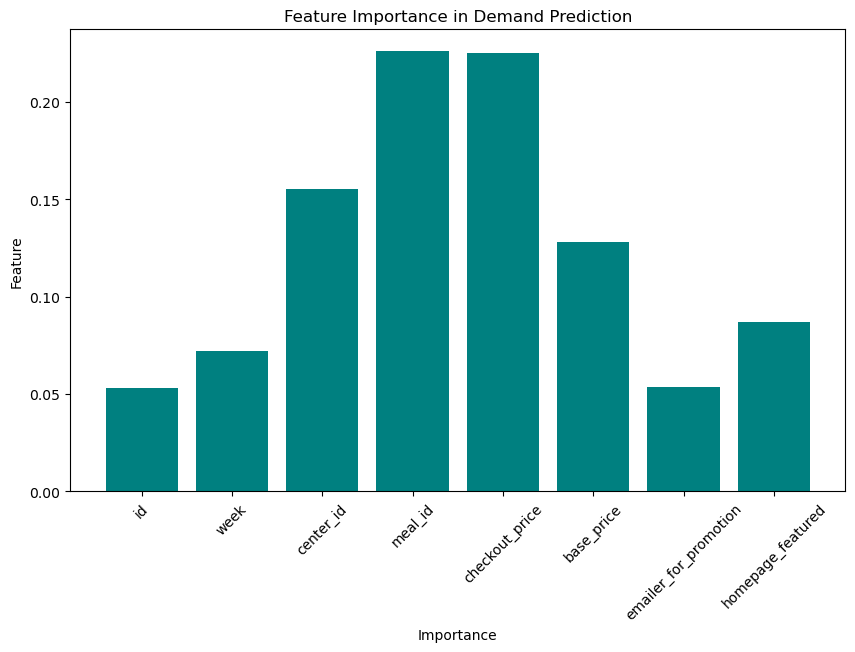

In [100]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'train_data' is already defined with columns including 'num_orders' and any datetime columns

# Step 1: Define the features (X) and target (y)
X_train = train_data.drop(columns=['num_orders'])  # Drop the target column 'num_orders'
y_train = train_data['num_orders']  # Define the target variable

# Step 2: Check for datetime columns and convert them to numeric (timestamp as int64)
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[col] = X_train[col].astype('int64')  # Convert datetime to integer timestamp

# Step 3: Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

try:
    rf_model.fit(X_train, y_train)  # Train the model on the prepared data

    # Step 4: Access the feature importances
    importances = rf_model.feature_importances_
    features = X_train.columns

    # Step 5: Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(features, importances, color="teal")
    plt.title("Feature Importance in Demand Prediction")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.xticks(rotation=45)
    plt.show()

except Exception as e:
    print("Error during model fitting or feature importance extraction:", e)


Linear Regression MSE: 124252.9446726673, R2 Score: 0.194755957313265


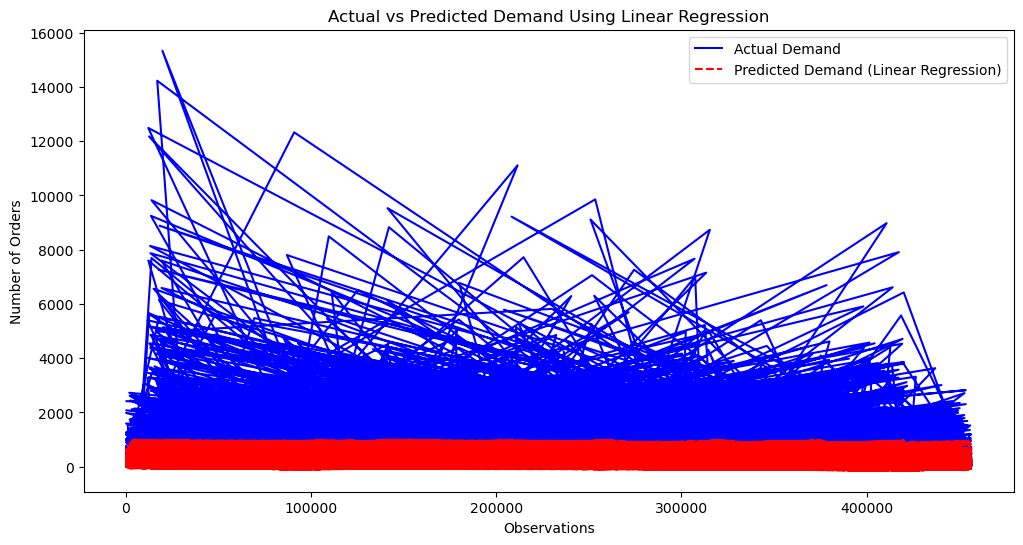

In [55]:

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for training
X = train_data.drop(['num_orders'], axis=1)
y = train_data['num_orders']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression MSE: {mse_lr}, R2 Score: {r2_lr}')

# LINE PLOT
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label="Actual Demand", color="blue")  # Use the index of y_test for x-axis
plt.plot(y_test.index, y_pred_lr, label="Predicted Demand (Linear Regression)", color="red", linestyle="--")  # Same index for predictions
plt.title("Actual vs Predicted Demand Using Linear Regression")
plt.xlabel("Observations")
plt.ylabel("Number of Orders")
plt.legend()
plt.show()

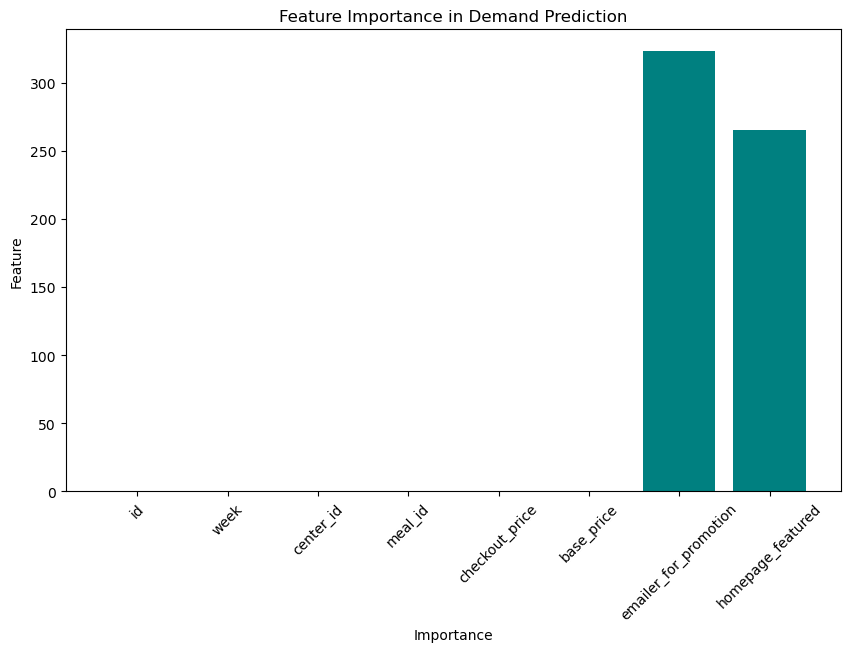

In [85]:
importances = abs(lr_model.coef_)  # Absolute value of the coefficients
features = train_data.drop(columns=['num_orders']).columns  # Replace with actual feature column names

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(features, importances, color="teal")
plt.title("Feature Importance in Demand Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.xticks(rotation=45)
plt.show()


In [57]:

# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree MSE: {mse_dt}, R2 Score: {r2_dt}')


Decision Tree MSE: 64253.50218669003, R2 Score: 0.583593370813909


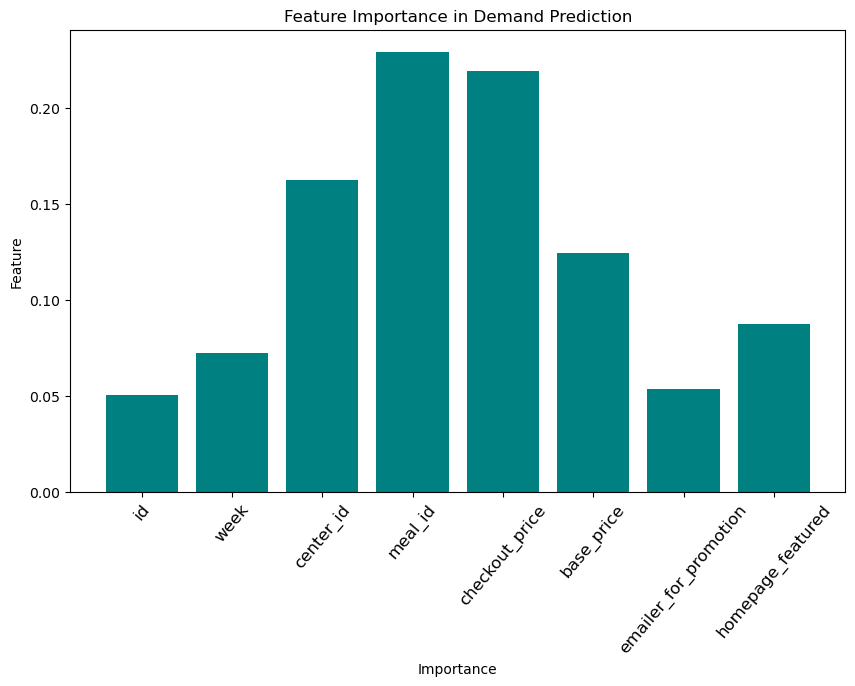

In [84]:
# Assuming 'model' is a trained DecisionTreeRegressor or RandomForestRegressor
importances = dt_model.feature_importances_  # Use feature_importances_ from your trained model
features = train_data.drop(columns=['num_orders']).columns  # Replace with actual feature column names

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(features, importances, color="teal")
plt.title("Feature Importance in Demand Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.xticks(rotation=50, fontsize=12)
plt.show()


In [98]:

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}, R2 Score: {r2_rf}')


Random Forest MSE: 4419.558793740006, R2 Score: 0.9710256462371368


In [99]:
# Assuming X_test is your test data (features) without 'num_orders'
# Example: X_test = test_data.drop(columns=['num_orders'])  # if num_orders is the target column

# Predict using the trained model (for example, using the Random Forest Regressor model)
y_pred_rf = rf_model.predict(X_test)

# Print the predicted values
print("Predicted number of orders:", y_pred_rf)

Predicted number of orders: [ 38.59 201.42 365.46 ... 360.67  68.35 381.15]


In [61]:
# Load the test data (if it was not already loaded)
# test_data = pd.read_csv('path_to_your_test_data.csv')

# Prepare the test data (ensure it matches the structure of X_train used for training)
# Drop any columns not needed for prediction, e.g., 'num_orders' if it's present
X_test = test_data.drop(columns=['num_orders'], errors='ignore')

# Predict using the trained model (let's say Random Forest here)
y_pred_rf = lr_model.predict(X_test)

# Convert predictions to a DataFrame if needed for submission or further analysis
predictions_df = pd.DataFrame({
    'id': test_data['id'],  # Assuming 'id' is the unique identifier in your test set
    'num_orders': y_pred_rf
})

# Print or save the predicted results
print(predictions_df.head())  # Preview the first few predictions
predictions_df.to_csv('sample_submission.csv', index=False)  # Save predictions to a CSV file


        id  num_orders
0  1028232  344.233338
1  1127204  343.945840
2  1212707  347.274861
3  1082698  345.055185
4  1400926  337.455756


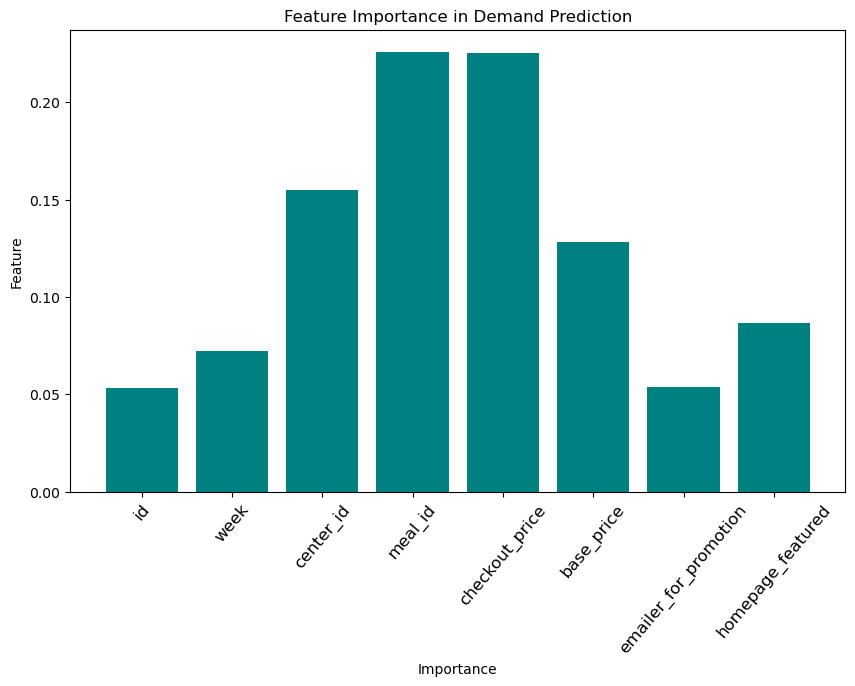

In [ ]:
# Assuming 'model' is a trained DecisionTreeRegressor or RandomForestRegressor
importances = rf_model.feature_importances_  # Use feature_importances_ from your trained model
features = train_data.drop(columns=['num_orders'],errors='ignore').columns  # Replace with actual feature column names

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(features, importances, color="teal")
plt.title("Feature Importance in Demand Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.xticks(rotation=50, fontsize=12)
plt.show()


In [62]:
y_pred_lr = lr_model.predict(X_test)

In [63]:
y_pred_dt = dt_model.predict(X_test)

In [64]:
y_pred_rf = rf_model.predict(X_test)

In [65]:
# Saving the predictions to a CSV file
predictions_df.to_csv('sample_submission.csv', index=False)

In [66]:
import pandas as pd

# Load the CSV file to verify its contents
saved_predictions = pd.read_csv('sample_submission.csv')

# Display the first few rows of the saved data
print(saved_predictions.head(20))


         id  num_orders
0   1028232  344.233338
1   1127204  343.945840
2   1212707  347.274861
3   1082698  345.055185
4   1400926  337.455756
5   1284113  321.403674
6   1197966  317.323261
7   1132739  289.410296
8   1057981  198.953773
9   1095932  182.993191
10  1454421  183.402513
11  1149765  244.234998
12  1166964  127.121202
13  1010949  234.409613
14  1409575  499.583691
15  1181616  234.496866
16  1456020  193.448347
17  1264395  223.027194
18  1472931  213.630324
19  1412015  337.456823


Columns with datetime type: Index([], dtype='object')
Shapes - X_train: (365238, 8), X_test: (91310, 8), y_train: (365238,), y_test: (91310,)


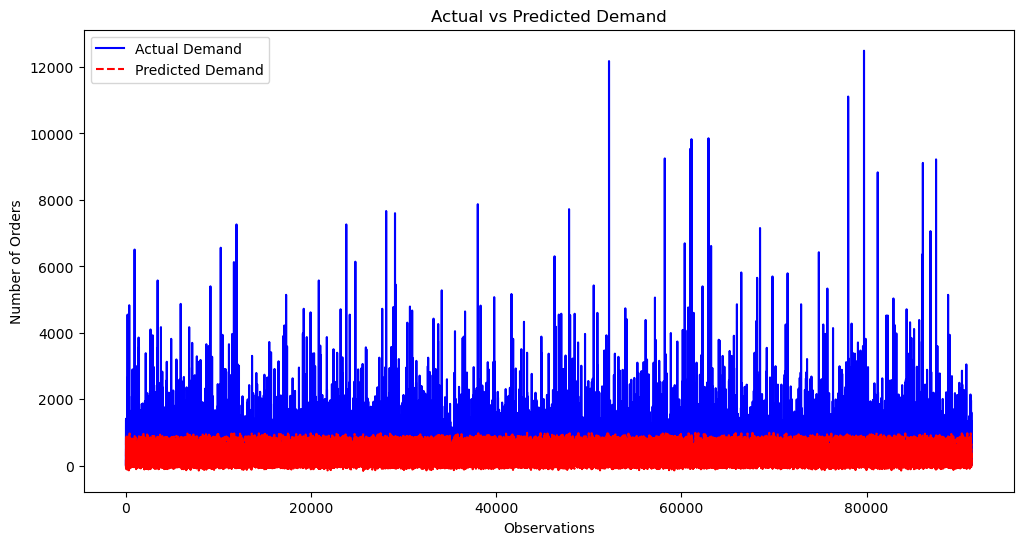

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv("D:\\Study\\SEM 5\\MACHINE LEARNING\\Project\\archive\\train.csv")

# Prepare the data
X = data.drop(columns=['num_orders'])
y = data['num_orders']

# Identify columns with datetime type
datetime_cols = X.select_dtypes(include=['datetime64']).columns
print(f"Columns with datetime type: {datetime_cols}")

# Option 1: Drop datetime columns if they are not needed
X = X.drop(columns=datetime_cols)

# Continue with splitting the data and training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes again
print(f"Shapes - X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Plotting the actual vs predicted demand
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Demand", color="blue")  # Convert to values if needed
plt.plot(y_pred, label="Predicted Demand", color="red", linestyle="--")  # Model predictions
plt.title("Actual vs Predicted Demand")
plt.xlabel("Observations")
plt.ylabel("Number of Orders")
plt.legend()
plt.show()